These exercises were completed as part of DataCamp's "Intro to Deep Learning with Keras" course.

# Learning the Handwritten Digits

You're going to build a model on the digits dataset, a sample dataset that comes pre-loaded with scikit learn. The digits dataset consist of 8x8 pixel handwritten digits from 0 to 9:

<img src='data/digs.png' width="600" height="300" align="center"/>

You want to distinguish between each of the 10 possible digits given an image, so we are dealing with multi-class classification.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (10, 8)

In [3]:
X = np.load('Digits/digits_pixels.npy')
y = np.load('Digits/digits_target.npy')

In [4]:
y = to_categorical(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
X_train.shape

(1257, 64)

In [7]:
y_train.shape

(1257, 10)

In [8]:
X_train

array([[ 0.,  0.,  3., ..., 12.,  0.,  0.],
       [ 0.,  0.,  2., ..., 13.,  5.,  0.],
       [ 0.,  0.,  1., ..., 16.,  2.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  2.,  0.,  0.],
       [ 0.,  1., 11., ..., 12.,  8.,  0.]])

In [9]:
# Instantiate a Sequential model
model = keras.Sequential()

# Input and hidden layer with input_shape, 16 neurons, and relu 
model.add(keras.layers.Dense(16, input_shape = (64,), activation = 'relu'))

# Output layer with 10 neurons (one per digit) and softmax
model.add(keras.layers.Dense(10, activation='softmax'))

# Compile your model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Test if your model is well assembled by predicting before training
print(model.predict(X_train))

[[1.5004164e-03 5.1612315e-06 4.7960007e-06 ... 9.3739240e-05
  7.7330053e-01 9.8057138e-04]
 [5.4650033e-01 3.3801617e-03 3.2820443e-03 ... 7.9748124e-02
  6.3056062e-04 3.8192768e-04]
 [2.2578710e-01 3.7880965e-02 3.3324363e-03 ... 2.1419623e-03
  3.0227059e-01 1.3399992e-02]
 ...
 [4.7320388e-02 4.4159696e-02 9.3280617e-03 ... 4.2757511e-05
  2.1644628e-04 6.3548912e-05]
 [5.3202691e-03 1.4988352e-01 1.2652302e-03 ... 7.1798882e-04
  3.8054117e-04 5.3998316e-04]
 [1.6512034e-03 4.5906849e-02 7.0968629e-03 ... 4.8622940e-07
  5.8316386e-01 4.6429317e-03]]


2022-01-18 22:51:33.700276: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-18 22:51:33.700523: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-18 22:51:33.758248: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


**Tip:** Predicting on training data inputs before training can help you quickly check that your model works as expected!

### Is the model overfitting?

In [10]:
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')

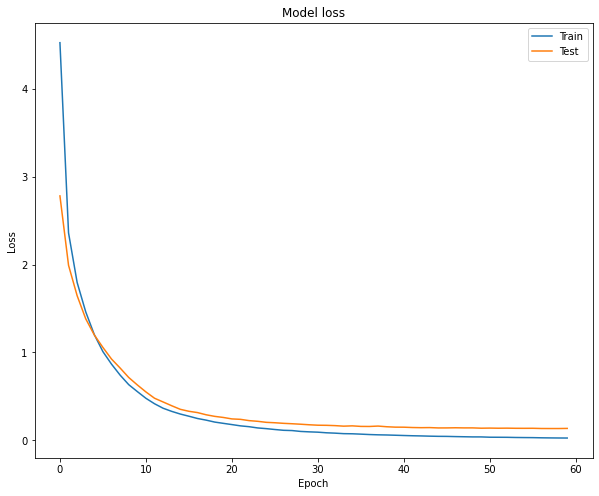

In [11]:
# Train your model for 60 epochs, using X_test and y_test as validation data
h_callback = model.fit(X_train, y_train, epochs = 60, validation_data = (X_test, y_test), verbose=0)

# Extract from the h_callback object loss and val_loss to plot the learning curve
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

We can see that while it doesn't appear that the model certainly isn't improving significantly anymore at around 60 epochs, it also does *not* appear to be overfitting. Could the model benefit from more training examples? Let's find out.

### Do we need more data?
Train your model on the different training sizes and evaluate the results on `X_test`. End by plotting the results with `plot_results()`.


In [12]:
def plot_results(train_accs,test_accs):
    plt.plot(training_sizes, train_accs, 'o-', label="Training Accuracy")
    plt.plot(training_sizes, test_accs, 'o-', label="Test Accuracy")
    plt.title('Accuracy vs Number of training samples')
    plt.xlabel('# of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc="best")

In [13]:
initial_weights = model.get_weights()

In [14]:
early_stop = EarlyStopping(monitor='loss', patience=1)
train_accs, test_accs = [], []
training_sizes = [125, 502, 879, 1255]

In [15]:
for size in training_sizes:
  	# Get a fraction of training data (we only care about the training data)
    X_train_frac, y_train_frac = X_train[:size], y_train[:size]

    # Reset the model to the initial weights and train it on the new training data fraction
    model.set_weights(initial_weights)
    model.fit(X_train_frac, y_train_frac, epochs = 50, callbacks = [early_stop])

    # Evaluate and store both: the training data fraction and the complete test set results
    train_accs.append(model.evaluate(X_train_frac, y_train_frac)[1])
    test_accs.append(model.evaluate(X_test, y_test)[1])

Epoch 1/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0188 - accuracy: 1.0000
Epoch 2/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0181 - accuracy: 1.0000
Epoch 3/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0156 - accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0141 - accuracy: 1.0000
Epoch 8/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0135 - accuracy: 1.0000
Epoch 9/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0130 - accuracy: 1.0000
Epoch 10/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0124 - accuracy: 1.0000
Epoch 11/50
4/4 [======================

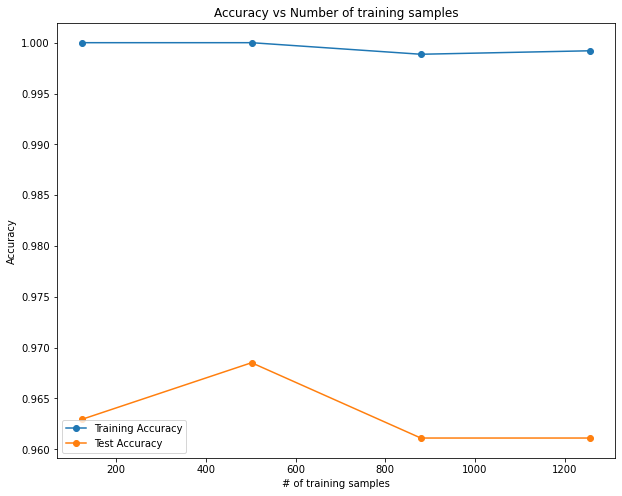

In [16]:
# Plot train vs test accuracies
plot_results(train_accs, test_accs)

The results suggest that your model would not benefit much from more training data, since the test set accuracy is already starting to flatten. 

You will now build a new deeper model consisting of 3 hidden layers of 50 neurons each, using batch normalization in between layers. The `kernel_initializer` parameter is used to initialize weights in a similar way.

### Batch normalization

In [17]:
# Build your deep network
batchnorm_model = keras.Sequential()
batchnorm_model.add(keras.layers.Dense(50, input_shape=(64,), activation='relu', kernel_initializer='normal'))
batchnorm_model.add(keras.layers.BatchNormalization())
batchnorm_model.add(keras.layers.Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(keras.layers.BatchNormalization())
batchnorm_model.add(keras.layers.Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(keras.layers.BatchNormalization())
batchnorm_model.add(keras.layers.Dense(10, activation='softmax', kernel_initializer='normal'))

# Compile your model with sgd
batchnorm_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Create a standard model (without batch normalization) with the exact same structure as the `batchnorm_model` above, for comparison.

In [18]:
standard_model = keras.Sequential()
standard_model.add(keras.layers.Dense(50, input_shape=(64, ), activation='relu', kernel_initializer='normal'))
standard_model.add(keras.layers.Dense(50, activation='relu', kernel_initializer='normal'))
standard_model.add(keras.layers.Dense(50, activation='relu', kernel_initializer='normal'))
standard_model.add(keras.layers.Dense(10, activation='softmax', kernel_initializer='normal'))

# Compile your model with sgd
standard_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Define a function to easy compare the plotted results of the two models created: `batchnorm_model` and `standard_model`.

In [19]:
def compare_histories_acc(h1,h2):
    plt.plot(h1.history['accuracy'])
    plt.plot(h1.history['val_accuracy'])
    plt.plot(h2.history['accuracy'])
    plt.plot(h2.history['val_accuracy'])
    plt.title("Batch Normalization Effects")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test', 'Train with Batch Normalization', 'Test with Batch Normalization'], loc='best')

Fit each model.

In [20]:
# Train your standard model, storing its history callback
h1_callback = standard_model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, verbose=0)

# Train the batch normalized model you recently built, store its history callback
h2_callback = batchnorm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=0)


Now use the function you defined above to plot the comparison of the two models.

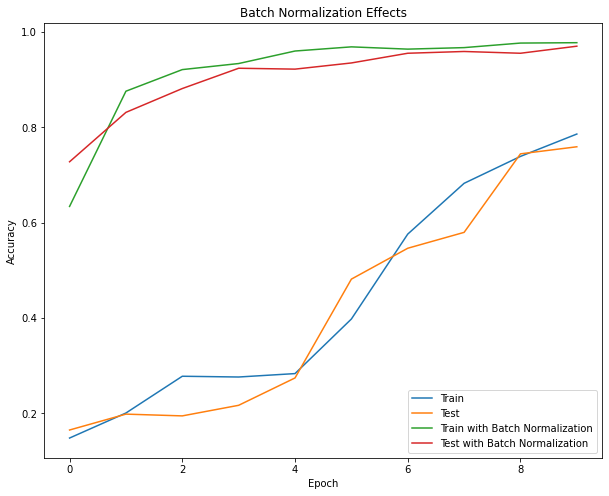

In [21]:
# Call compare_histories_acc passing in both model histories
compare_histories_acc(h1_callback, h2_callback)

You can see that for this deep model batch normalization proved to be useful, helping the model obtain high accuracy values just over the first 10 training epochs.